In [3]:
!pip install tensorflow opencv-python matplotlib



Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
ansicon                       1.89.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
baseline                      1.2.1
bcrypt

In [62]:
import tensorflow as tf
import os

In [10]:
import cv2
import imghdr

In [11]:
import cv2
import imghdr

In [13]:
data_dir = 'data'

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
train_data = tf.keras.utils.image_dataset_from_directory('data/train')

Found 1924 files belonging to 2 classes.


In [43]:
train_data_iterator = train_data.as_numpy_iterator()

In [44]:
batch = train_data_iterator.next()

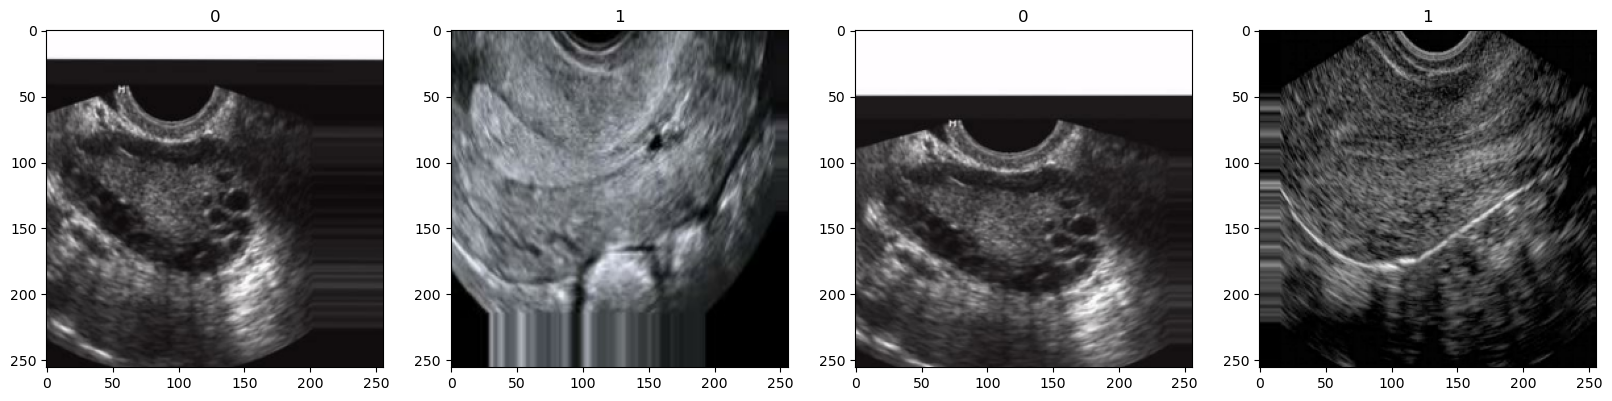

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [46]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [47]:
train_data.as_numpy_iterator().next()

(array([[[[0.7091299 , 0.7091299 , 0.7091299 ],
          [0.7091299 , 0.7091299 , 0.7091299 ],
          [0.7091299 , 0.7091299 , 0.7091299 ],
          ...,
          [0.7019608 , 0.7019608 , 0.7019608 ],
          [0.7019608 , 0.7019608 , 0.7019608 ],
          [0.7019608 , 0.7019608 , 0.7019608 ]],
 
         [[0.67668504, 0.67668504, 0.67668504],
          [0.67668504, 0.67668504, 0.67668504],
          [0.67668504, 0.67668504, 0.67668504],
          ...,
          [0.7029718 , 0.7029718 , 0.7029718 ],
          [0.7029718 , 0.7029718 , 0.7029718 ],
          [0.7029718 , 0.7029718 , 0.7029718 ]],
 
         [[0.344424  , 0.344424  , 0.344424  ],
          [0.344424  , 0.344424  , 0.344424  ],
          [0.344424  , 0.344424  , 0.344424  ],
          ...,
          [0.60309434, 0.60309434, 0.60309434],
          [0.60309434, 0.60309434, 0.60309434],
          [0.60309434, 0.60309434, 0.60309434]],
 
         ...,
 
         [[0.00223652, 0.00223652, 0.00223652],
          [0.00223

In [48]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test')

Found 1932 files belonging to 2 classes.


In [49]:
test_data_iterator = test_data.as_numpy_iterator()

In [54]:
batch = test_data_iterator.next()

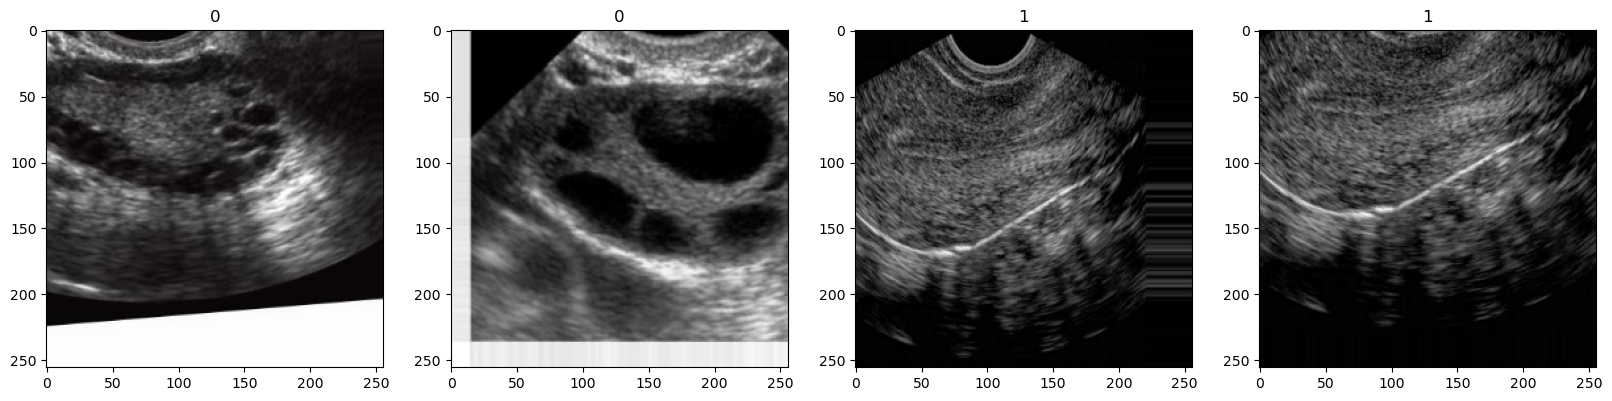

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [56]:
test_data = test_data.map(lambda x,y: (x/255, y))
train_data.as_numpy_iterator().next()

(array([[[[0.00716912, 0.00716912, 0.01501225],
          [0.00716912, 0.00716912, 0.01501225],
          [0.00716912, 0.00716912, 0.01501225],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00168505, 0.00168505, 0.00952819],
          [0.00168505, 0.00168505, 0.00952819],
          [0.00168505, 0.00168505, 0.00952819],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.7019608 , 0.7019608 , 0.7019608 ],
          [0.70196

In [57]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [69]:
model = Sequential()

In [70]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [73]:
model.fit(train_data, epochs=20)

Epoch 1/20
61/61 [==============================] - 43s 673ms/step - loss: 0.1476 - accuracy: 0.9381
Epoch 2/20
61/61 [==============================] - 40s 647ms/step - loss: 0.0190 - accuracy: 0.9927
Epoch 3/20
61/61 [==============================] - 40s 648ms/step - loss: 4.3279e-04 - accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 40s 653ms/step - loss: 1.4746e-04 - accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 40s 646ms/step - loss: 9.7610e-05 - accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 40s 648ms/step - loss: 6.2850e-05 - accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 40s 650ms/step - loss: 4.3547e-05 - accuracy: 1.0000
Epoch 8/20
61/61 [==============================] - 40s 656ms/step - loss: 3.0206e-05 - accuracy: 1.0000
Epoch 9/20
61/61 [==============================] - 41s 670ms/step - loss: 2.3778e-05 - accuracy: 1.0000
Epoch 10/20
61/61 [==============================] - 41s 670ms/